In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('whitegrid')
sns.set_context("poster")

In [3]:
df = pd.read_hdf('elite_sens.h5', 'table')

```
Sensor locations
271: NE SS
229: NE MS
134: SW SS
204: SE SS
2753: NE SS
```

In [4]:
df.corr()

trf_count   tmp_271   str_229   str_134  disp_204  \
trf_count       1.000000  0.157891 -0.185536  0.114213 -0.263008   
tmp_271         0.157891  1.000000 -0.537066  0.265033 -0.439385   
str_229        -0.185536 -0.537066  1.000000  0.157650  0.290304   
str_134         0.114213  0.265033  0.157650  1.000000  0.017112   
disp_204       -0.263008 -0.439385  0.290304  0.017112  1.000000   
pressure_2753  -0.069763 -0.426015       NaN  0.096369  0.255566   

               pressure_2753  
trf_count          -0.069763  
tmp_271            -0.426015  
str_229                  NaN  
str_134             0.096369  
disp_204            0.255566  
pressure_2753       1.000000

In [6]:
df.dtypes

trf_count        float64
tmp_271          float64
str_229          float64
str_134          float64
disp_204         float64
pressure_2753    float64
dtype: object

In [18]:
len(df) - df.trf_count.isnull().sum()

488792

In [19]:
df.dropna()

Empty DataFrame
Columns: [trf_count, tmp_271, str_229, str_134, disp_204, pressure_2753]
Index: []

In [26]:
df.head()

trf_count    tmp_271     str_229  str_134  disp_204  \
timestamp                                                                  
2016-03-01 00:00:00        NaN  15.772068 -703.685852 -1.22429  267.0557   
2016-03-01 00:01:00        NaN  15.853798 -679.604295      NaN       NaN   
2016-03-01 00:02:00        NaN  16.004606 -730.029733      NaN       NaN   
2016-03-01 00:03:00        NaN  16.040288 -724.782943      NaN       NaN   
2016-03-01 00:04:00        NaN  15.949598 -710.251874      NaN       NaN   

                     pressure_2753  
timestamp                           
2016-03-01 00:00:00            NaN  
2016-03-01 00:01:00            NaN  
2016-03-01 00:02:00            NaN  
2016-03-01 00:03:00            NaN  
2016-03-01 00:04:00            NaN

C:\Users\brian1123\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


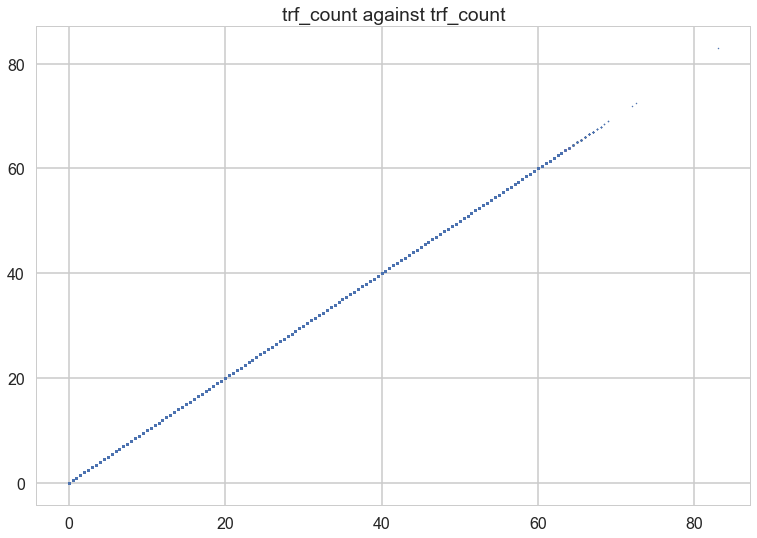

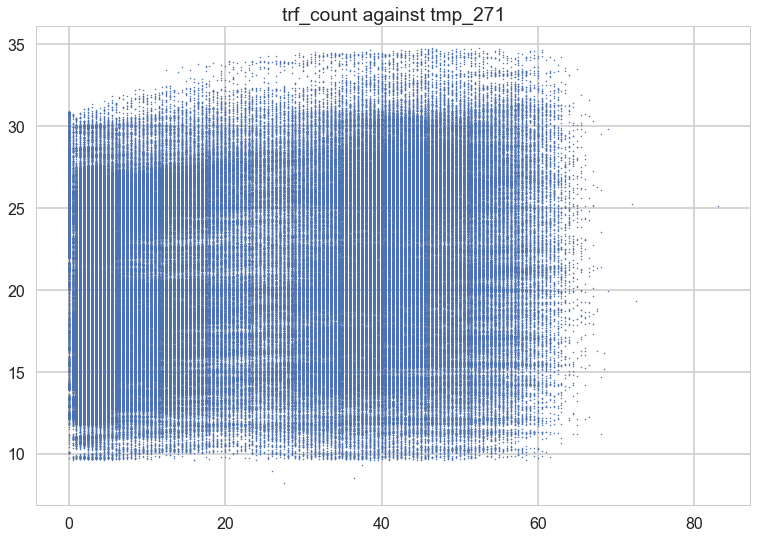

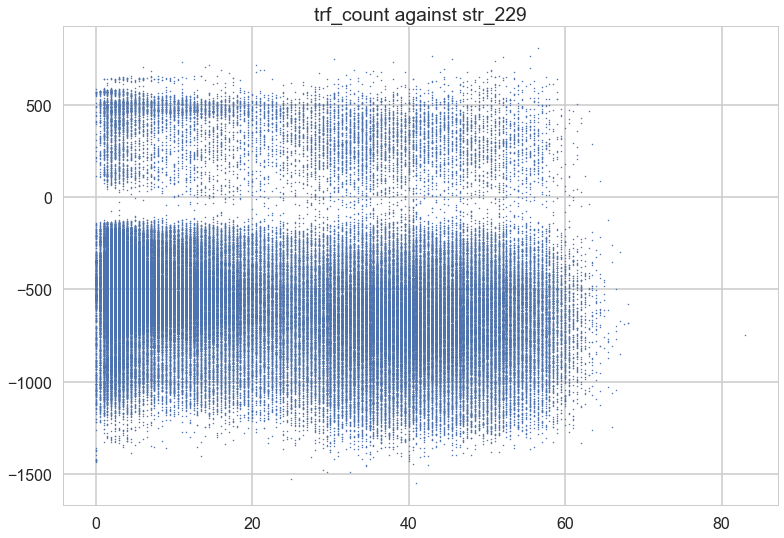

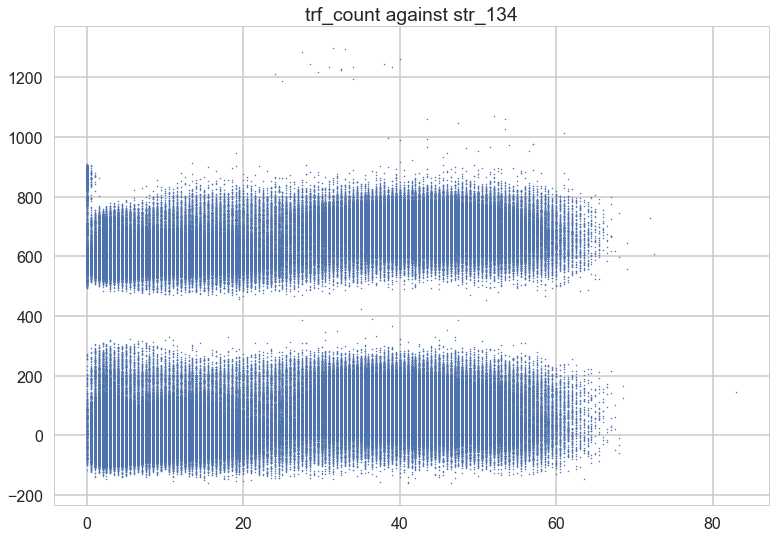

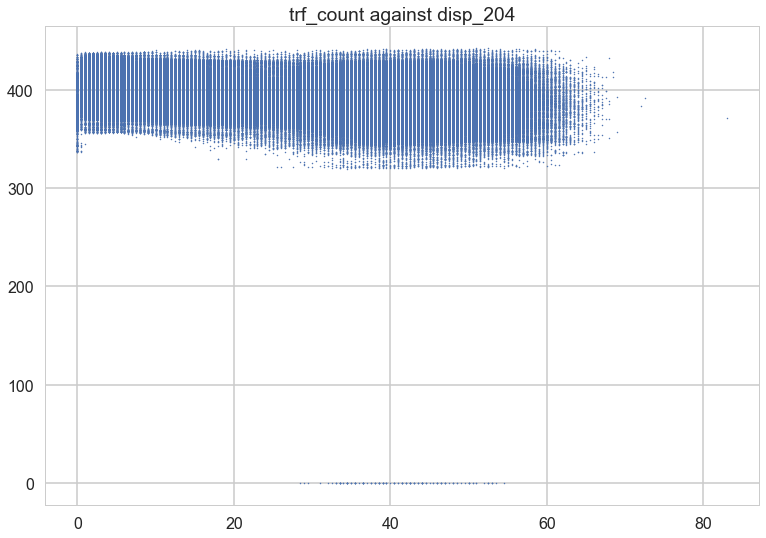

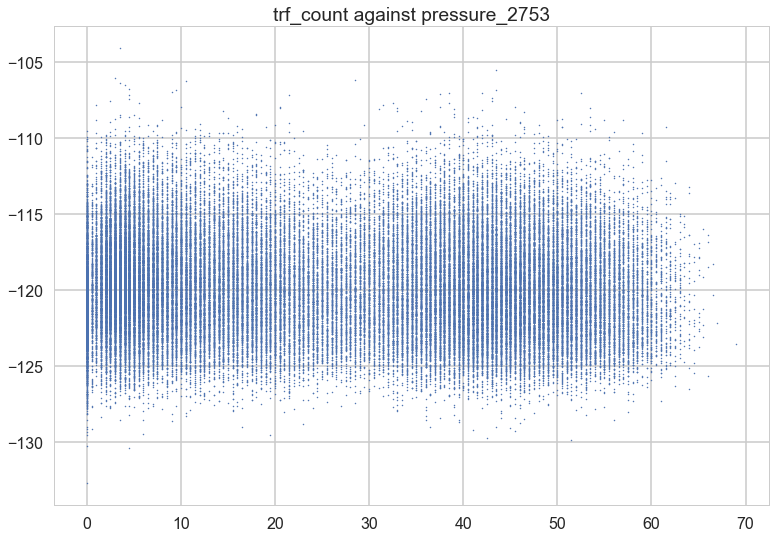

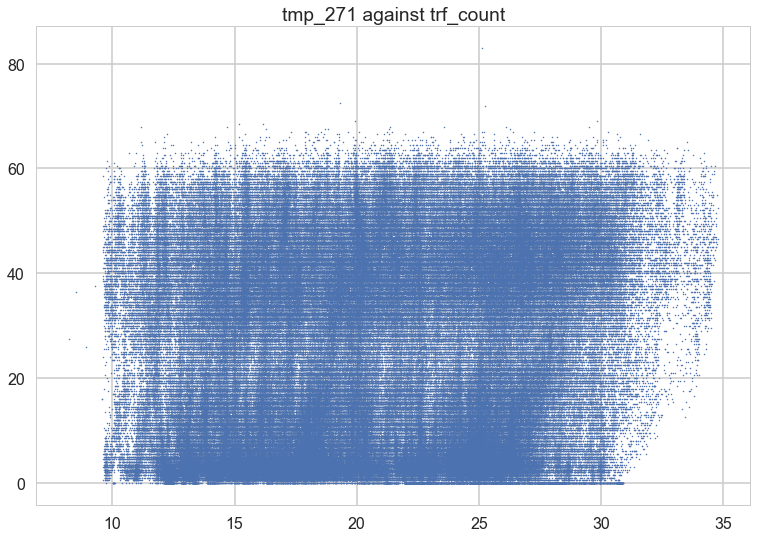

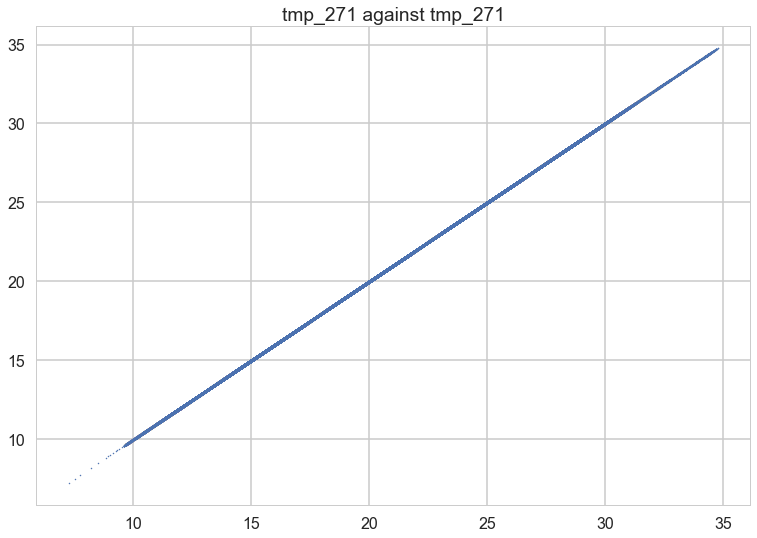

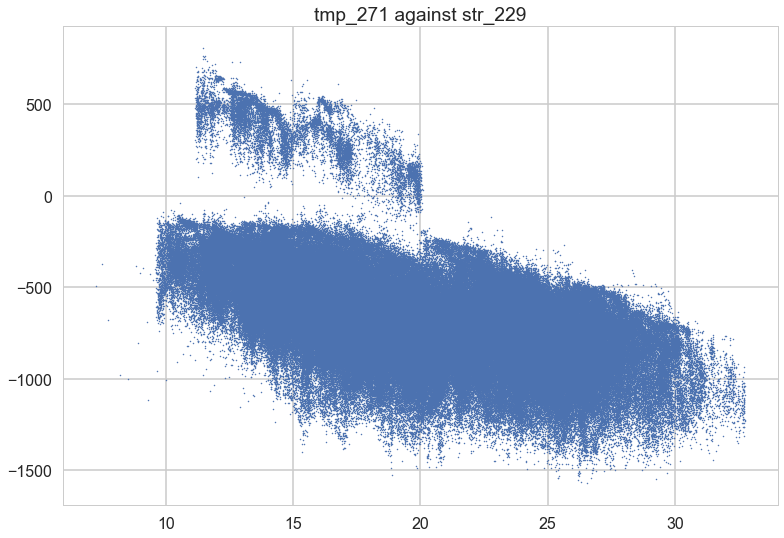

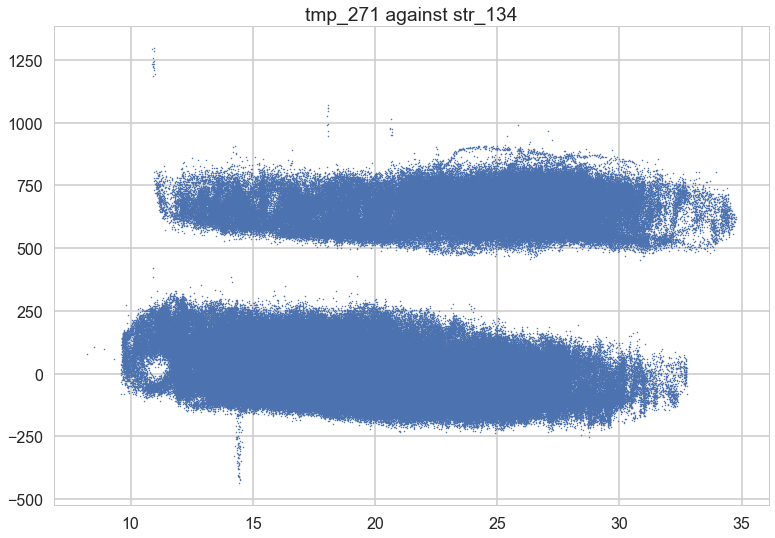

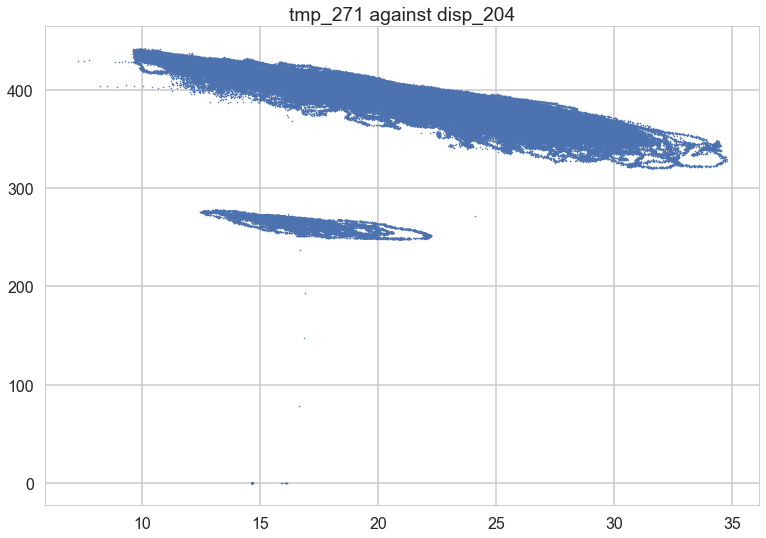

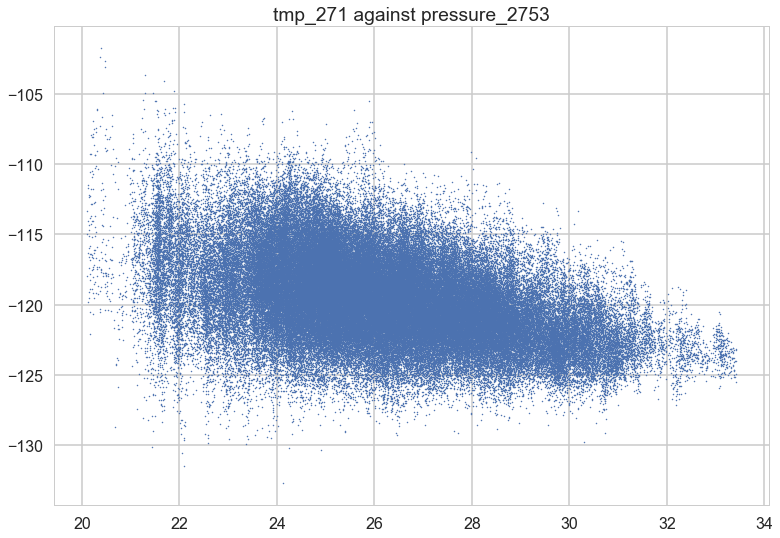

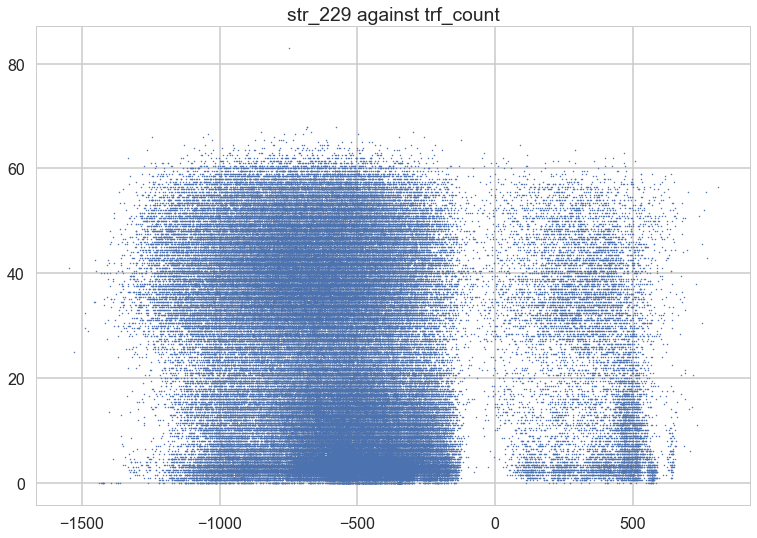

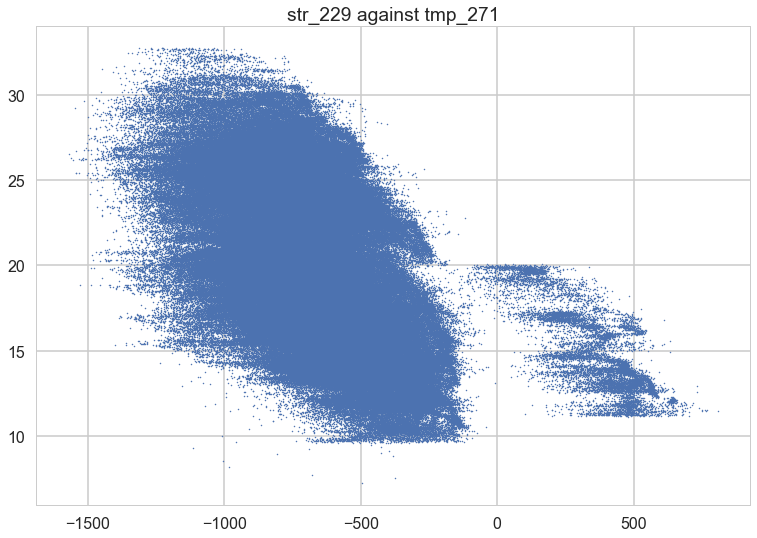

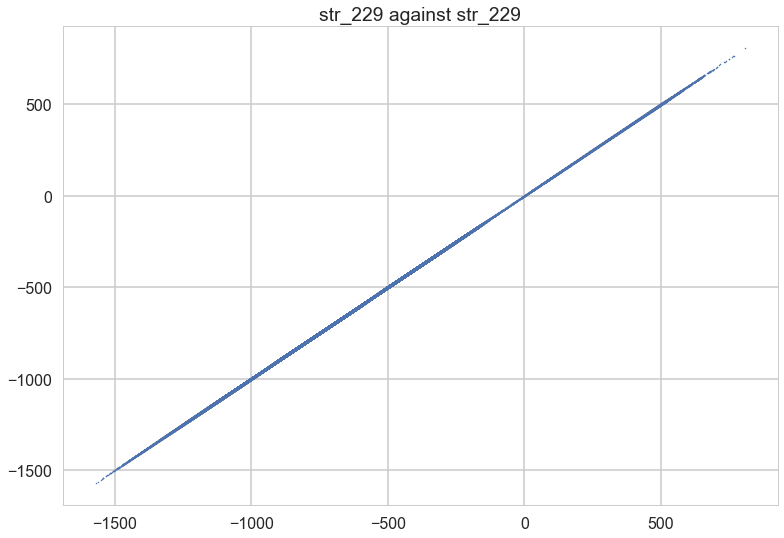

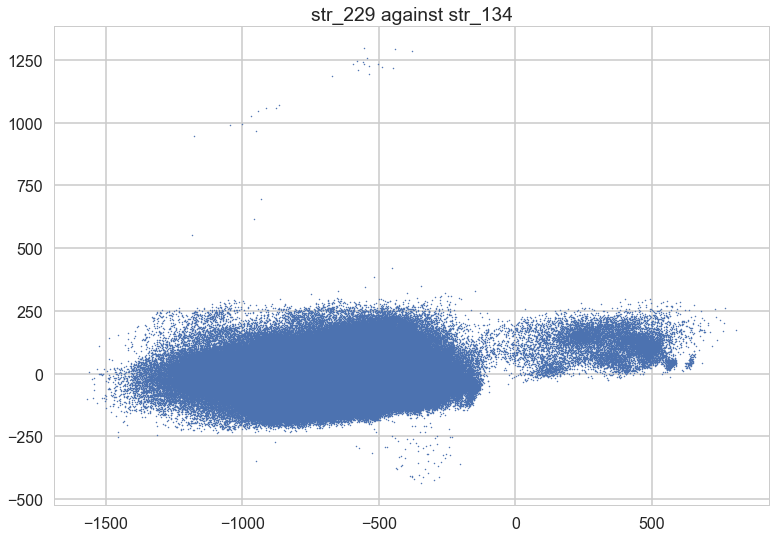

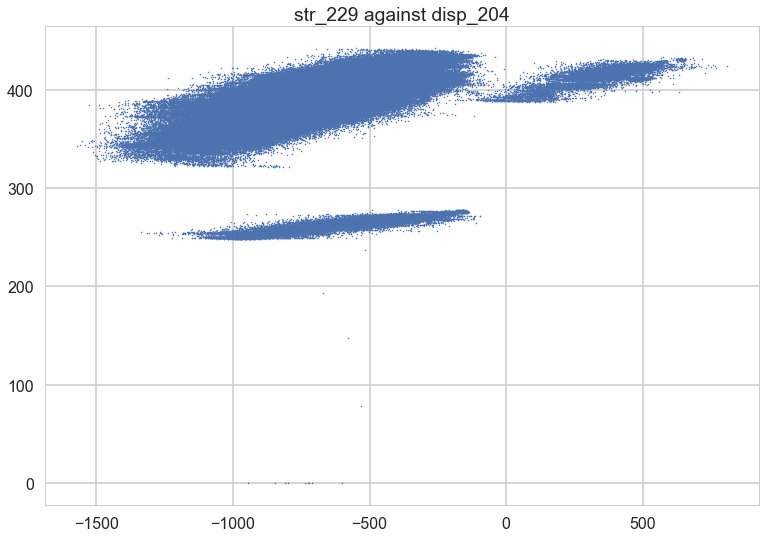

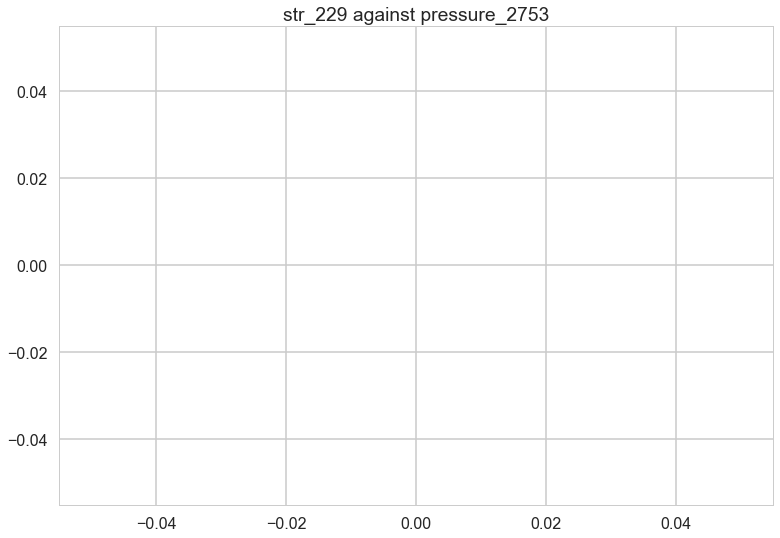

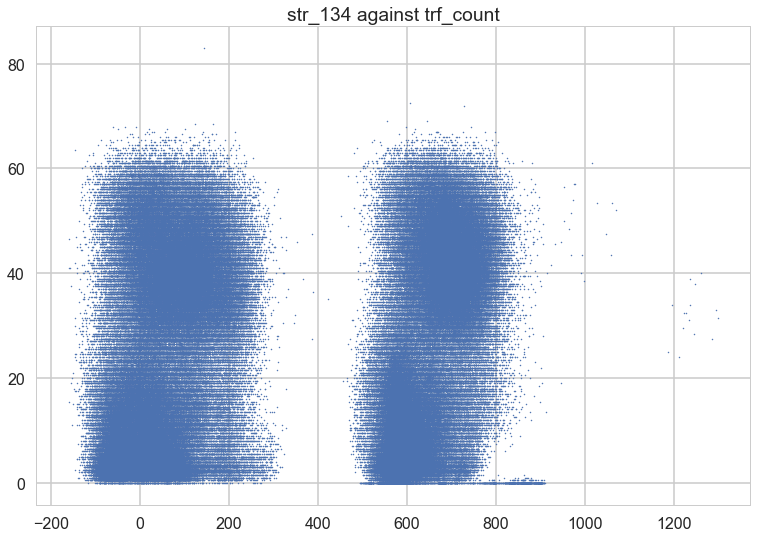

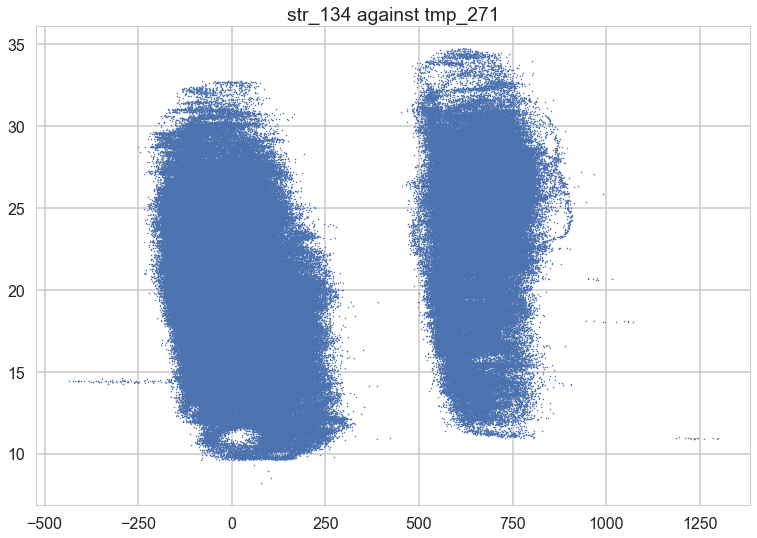

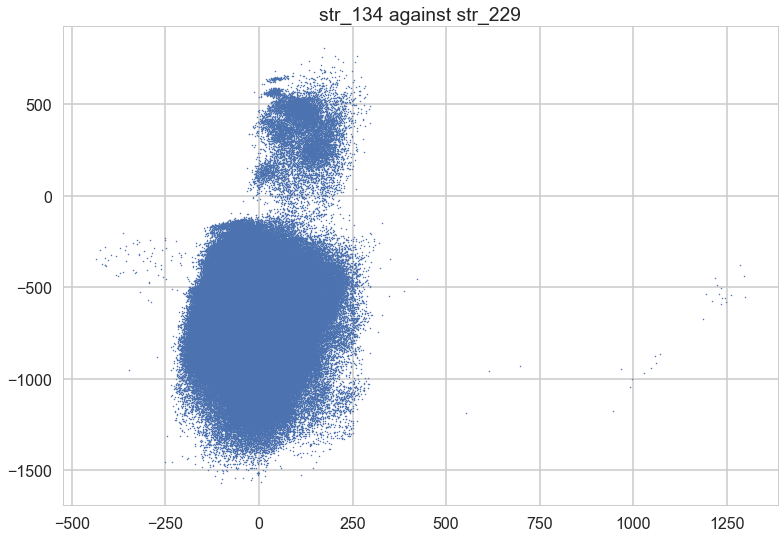

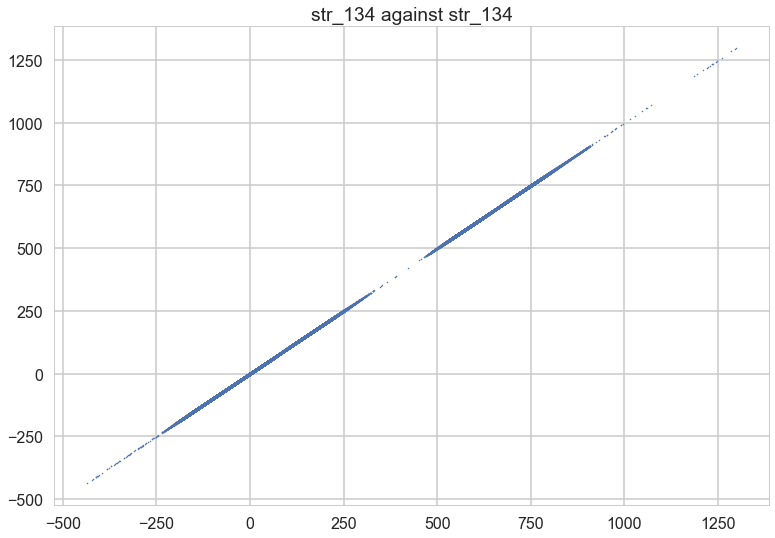

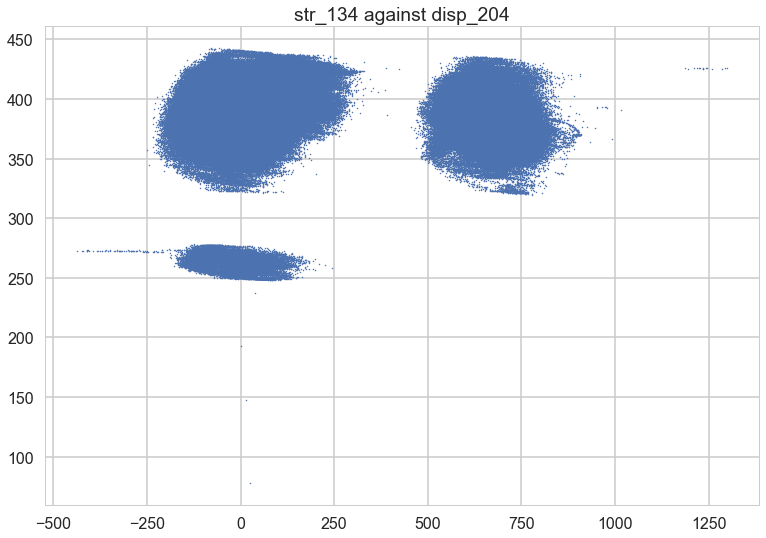

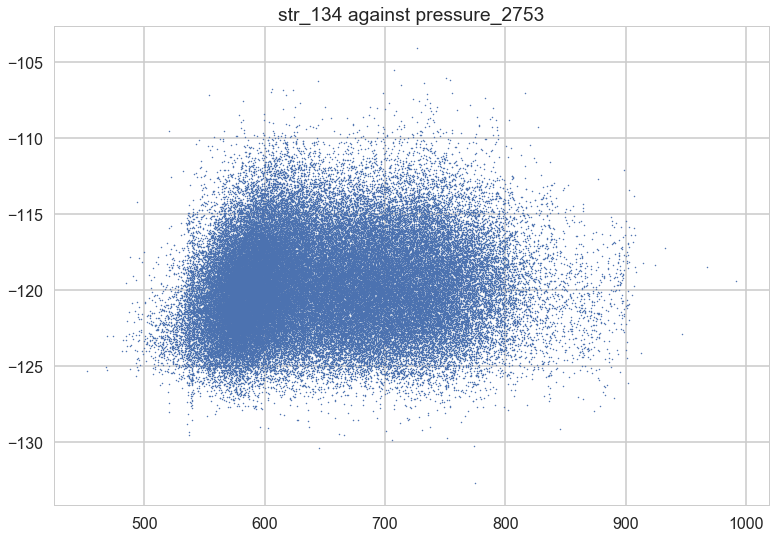

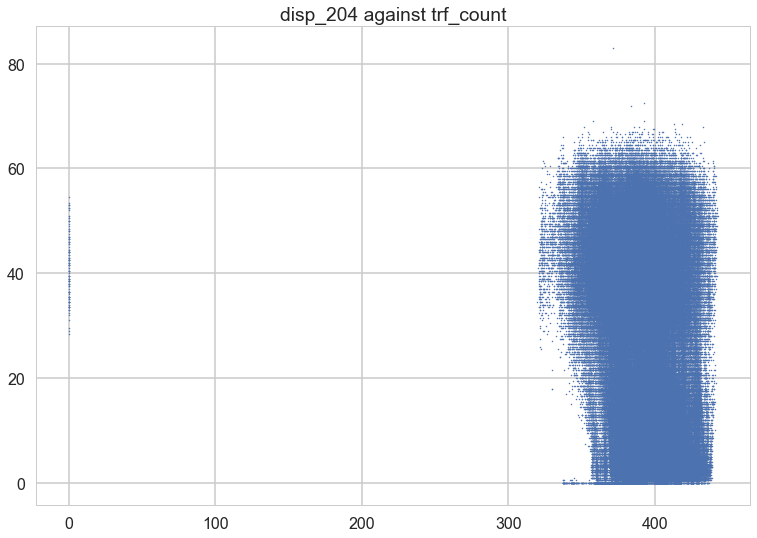

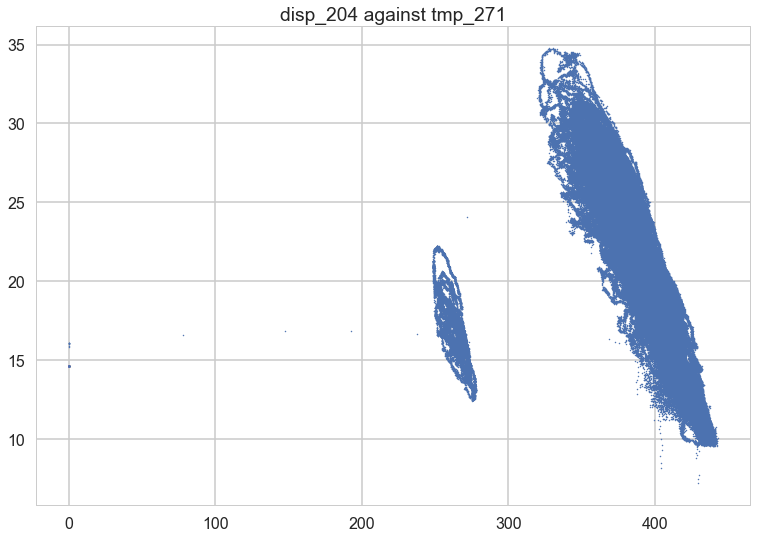

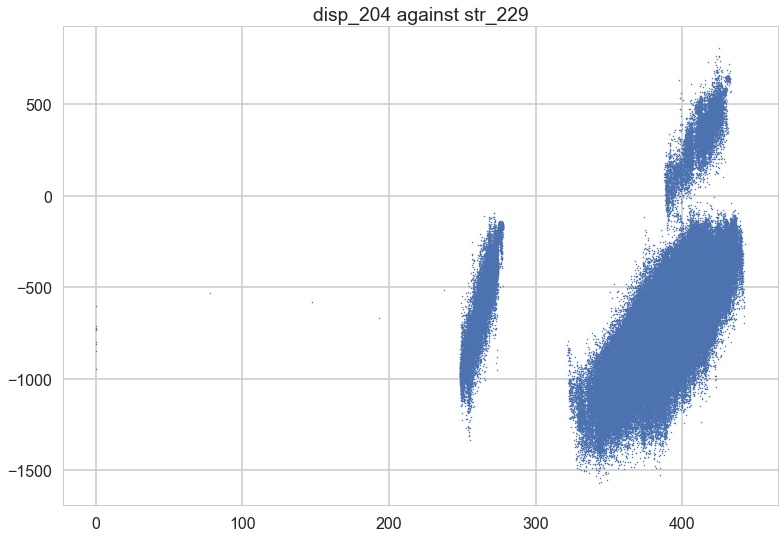

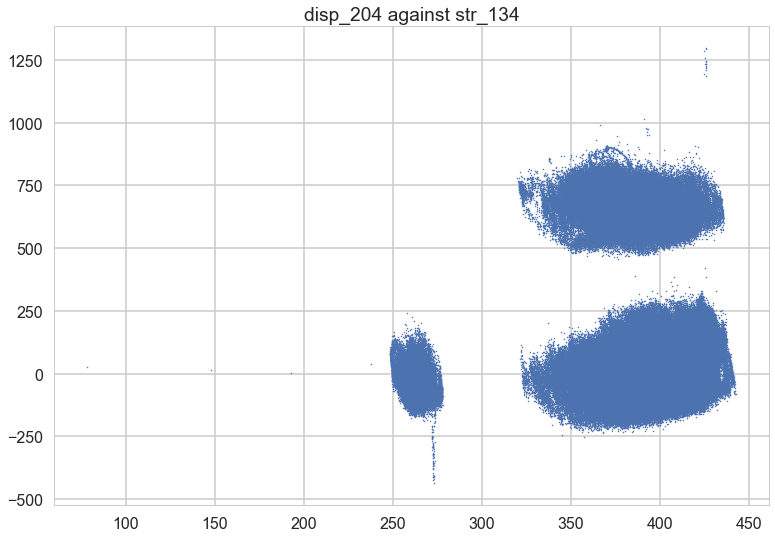

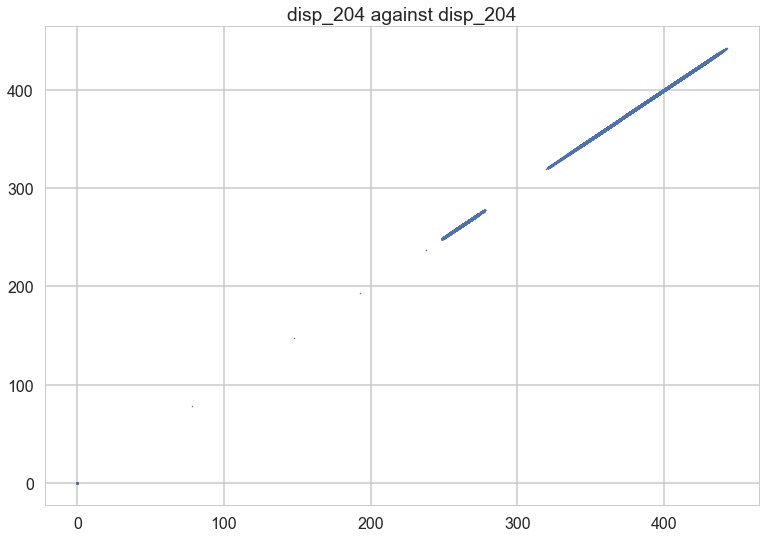

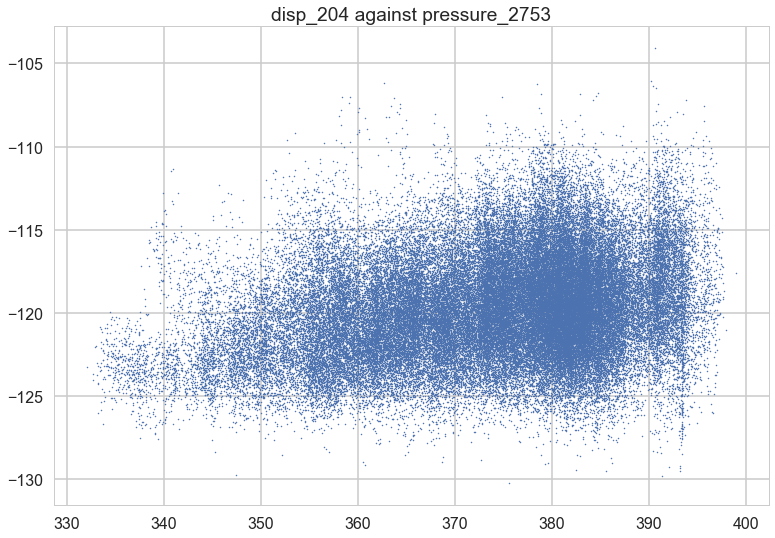

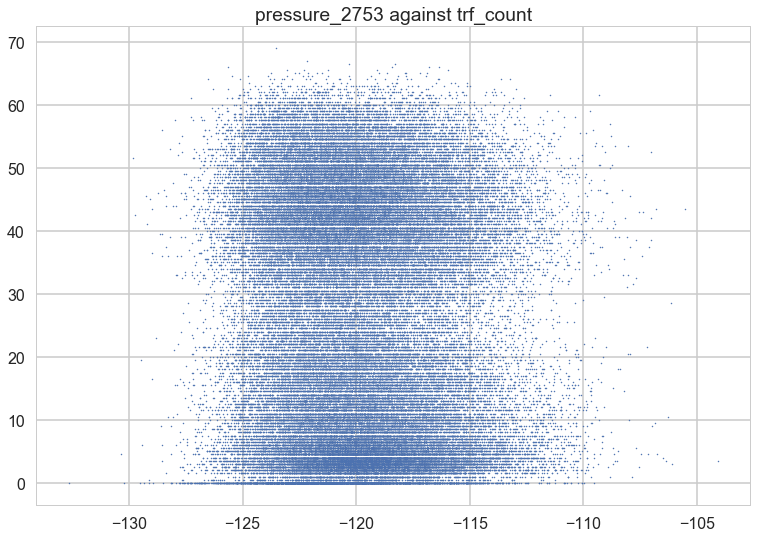

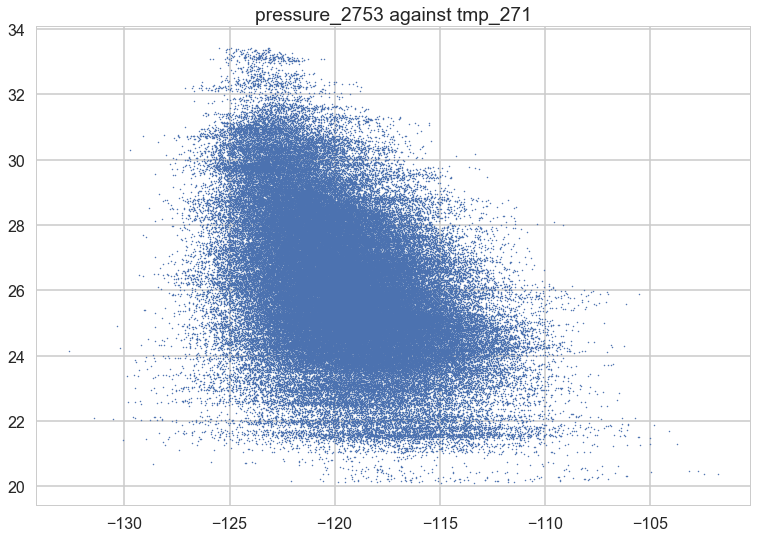

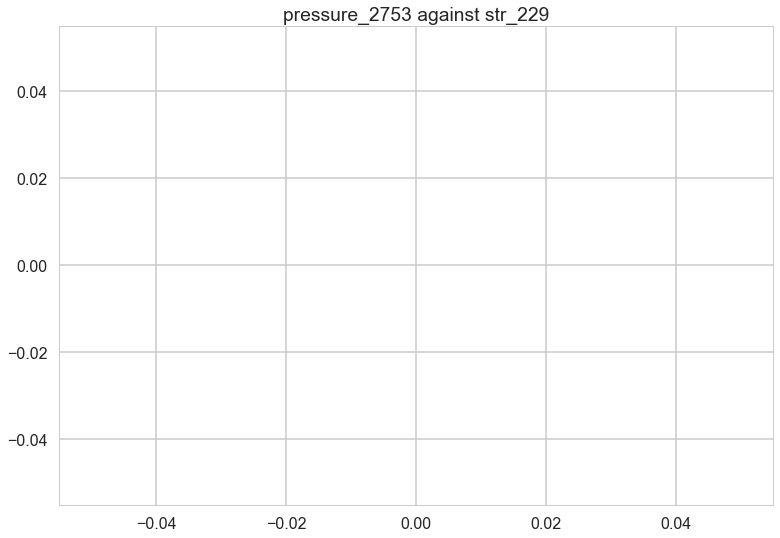

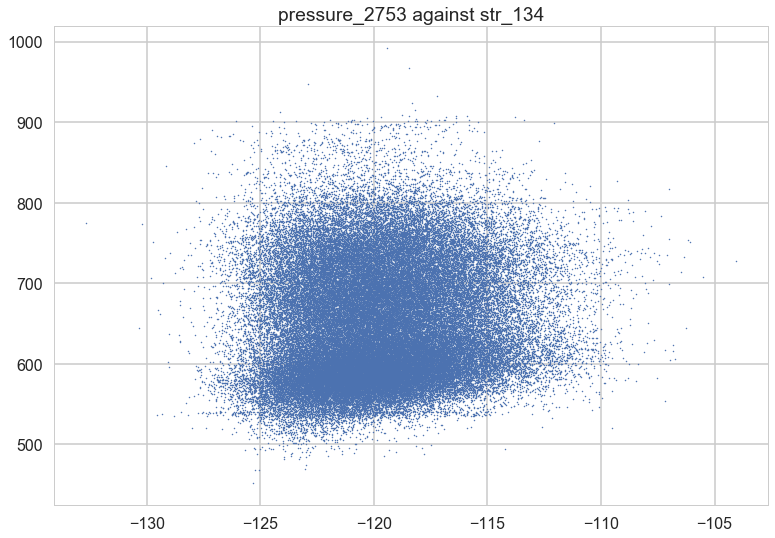

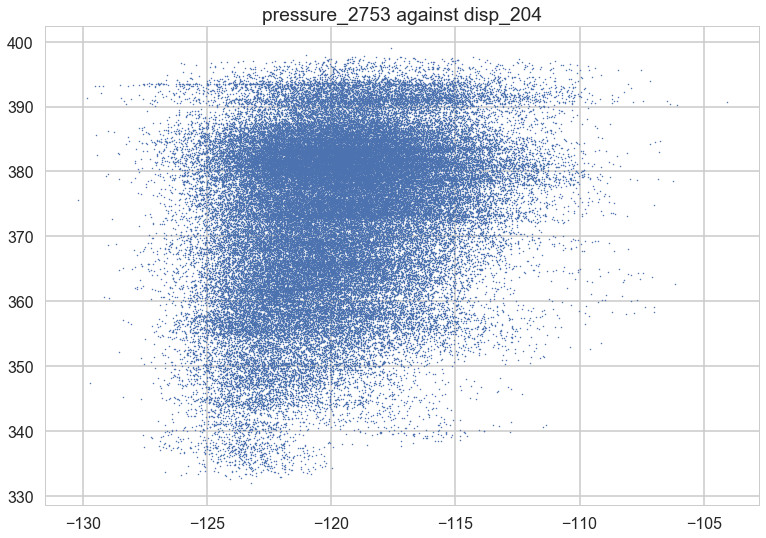

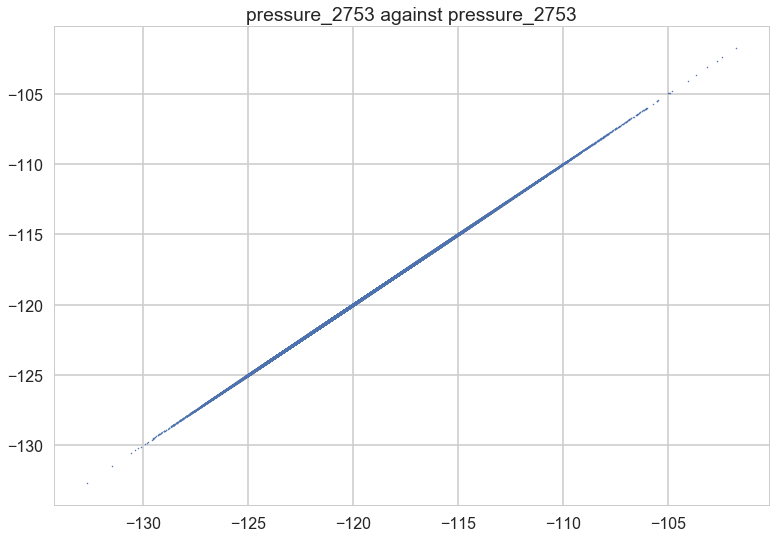

In [34]:
for col in df.columns:
    for col2 in df.columns:
        try:
            plt.figure()
            plt.scatter(col, col2, data=df, marker='.', s=4)
            plt.title('{} against {}'.format(col, col2))
        except:
            pass

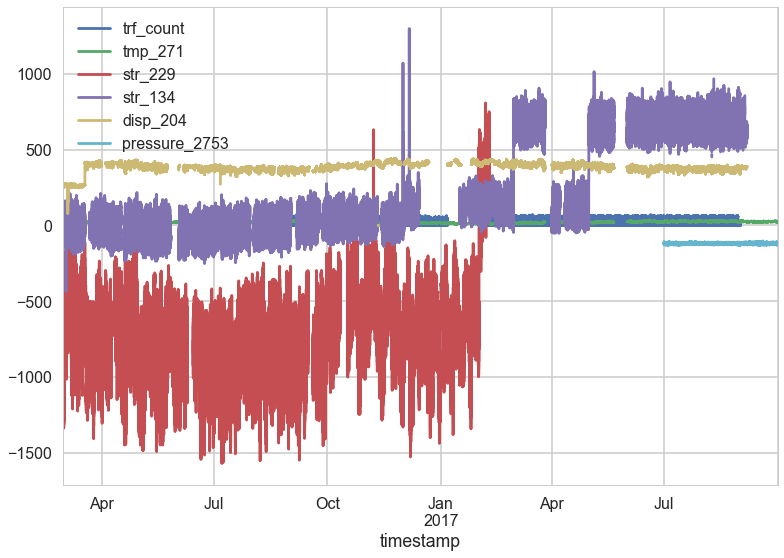

In [35]:
df.plot()

In [36]:
from sklearn.neural_network import MLPRegressor

In [80]:
dfa = df[['trf_count', 'tmp_271', 'disp_204', 'str_229']].dropna()

In [81]:
len(dfa)

145075

In [82]:
X = dfa[['trf_count', 'tmp_271', 'disp_204']]
y = dfa['str_229']

In [59]:
model = MLPRegressor().fit(X, y)

In [60]:
y_pred = model.predict(X)
result = model.score(X, y_pred)

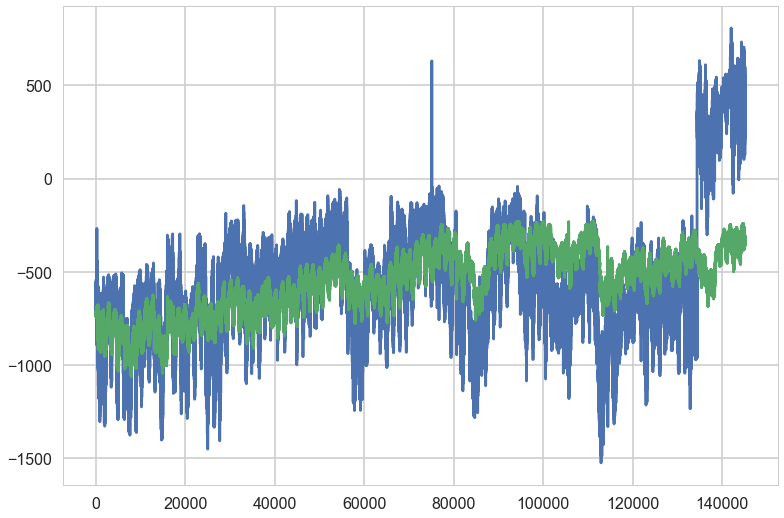

In [66]:
plt.plot(y.values)
plt.plot(y_pred)

In [72]:
y_pred = model.predict(df[['trf_count', 'tmp_271', 'disp_204']].dropna())

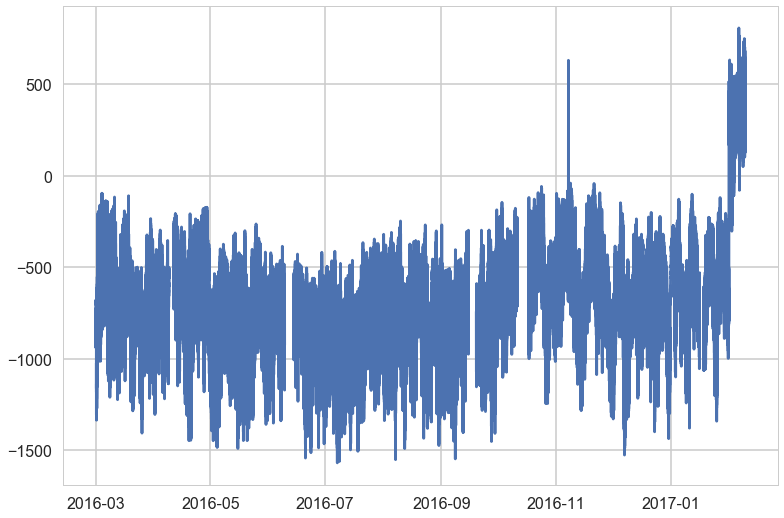

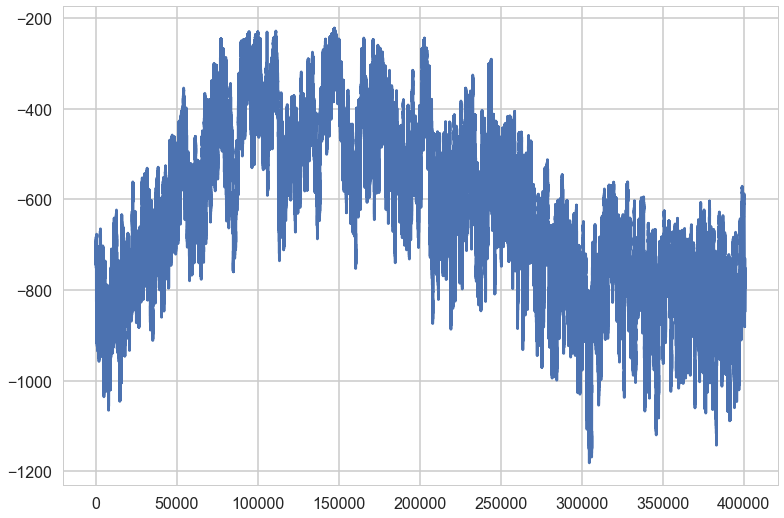

In [77]:
plt.plot(df['str_229'])
plt.figure()
plt.plot(y_pred)

Fillna using ANN

## Handle Missing Data

In [87]:
df['trf_count'].isnull().sum()

344968

In [91]:
for col in df.columns:
    print("{} -- amount of data: {}".format(col, len(df[col])))
    print("{} -- amount of missing data: {}".format(col, df[col].isnull().sum()))
    print("{} -- percentage of missing data: {:.2f}".format(col, df[col].isnull().sum() / len(df[col])))
    print("")

trf_count -- amount of data: 833760
trf_count -- amount of missing data: 344968
trf_count -- percentage of missing data: 0.41

tmp_271 -- amount of data: 833760
tmp_271 -- amount of missing data: 69240
tmp_271 -- percentage of missing data: 0.08

str_229 -- amount of data: 833760
str_229 -- amount of missing data: 378529
str_229 -- percentage of missing data: 0.45

str_134 -- amount of data: 833760
str_134 -- amount of missing data: 184299
str_134 -- percentage of missing data: 0.22

disp_204 -- amount of data: 833760
disp_204 -- amount of missing data: 171570
disp_204 -- percentage of missing data: 0.21

pressure_2753 -- amount of data: 833760
pressure_2753 -- amount of missing data: 703739
pressure_2753 -- percentage of missing data: 0.84



In [92]:
dfa = df[['str_229', 'str_134', 'tmp_271', 'trf_count', 'disp_204']].dropna()

In [93]:
dfa.head()

str_229    str_134    tmp_271  trf_count    disp_204
timestamp                                                                   
2016-09-01 00:00:00 -651.110004 -66.343310  26.408912        7.5  378.090412
2016-09-01 00:01:00 -661.347023 -77.779957  26.369701        7.5  378.565010
2016-09-01 00:02:00 -670.647702 -72.921464  26.385968        4.0  378.682163
2016-09-01 00:03:00 -641.910649 -79.479409  26.450293        4.5  378.452955
2016-09-01 00:04:00 -711.446827 -88.495083  26.418447        4.0  378.393790

In [94]:
len(dfa)

112501

In [96]:
X = dfa.drop('str_134', axis=1)
y = dfa['str_134']

In [97]:
model = MLPRegressor().fit(X, y)

In [98]:
y_pred = model.predict(X)

In [111]:
model.score(X, y)

0.44944813007299605

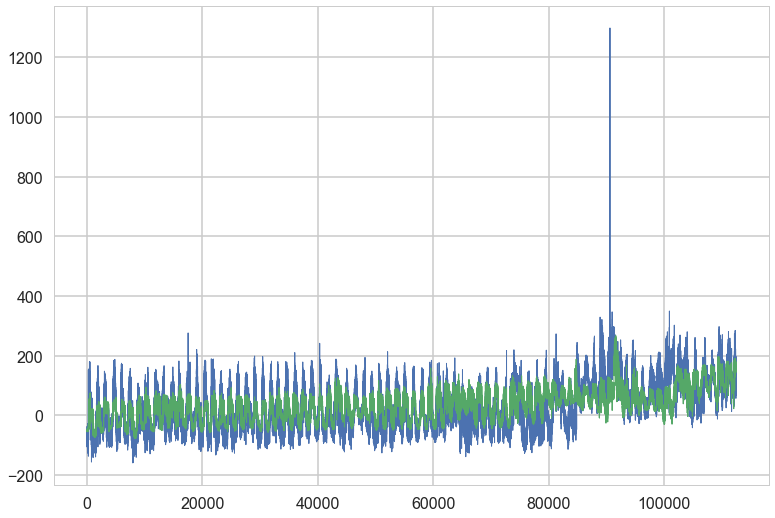

In [106]:
plt.plot(y.values, linewidth=1)
plt.plot(y_pred, linewidth=1)

Random Forest

In [107]:
from sklearn.ensemble import RandomForestRegressor

In [108]:
tree = RandomForestRegressor().fit(X, y)
y_pred = tree.predict(X)

In [112]:
tree.score(X, y)

0.97285059049155376

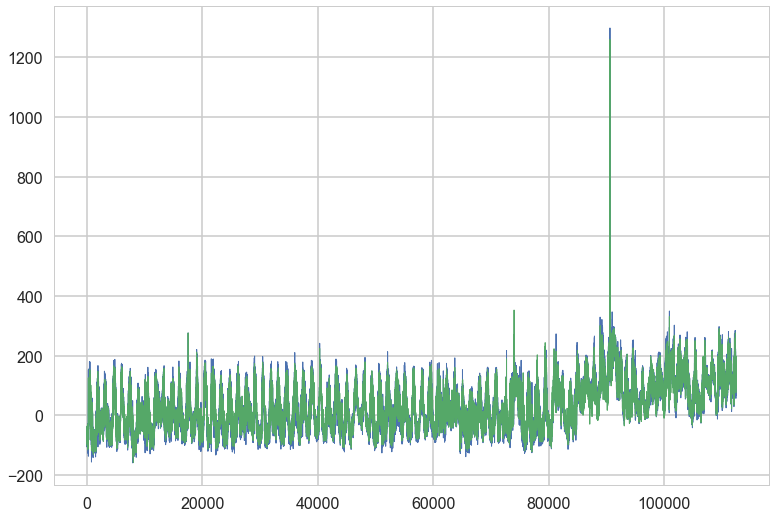

In [109]:
plt.plot(y.values, linewidth=1)
plt.plot(y_pred, linewidth=1)

In [110]:
tree.feature_importances_

array([ 0.27838627,  0.2834951 ,  0.20525824,  0.23286039])

predict missing str_134 data

In [131]:
d = df.loc['2017-04-01':'2017-05-01']

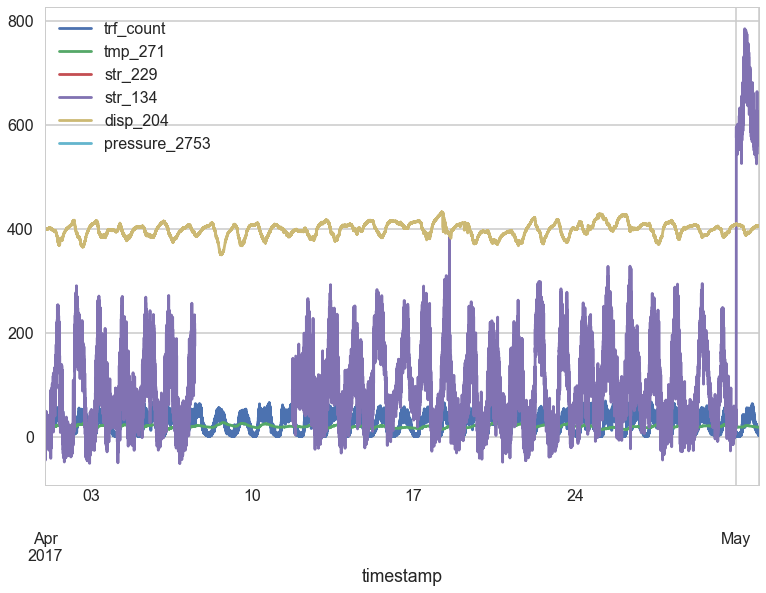

In [132]:
d.plot()

In [147]:
d = df.loc['2017-04-12':'2017-04-27'].drop(['str_229', 'pressure_2753'], axis=1)
d.tmp_271 = d.tmp_271.fillna(d.tmp_271.median())
d.head()

trf_count    tmp_271     str_134    disp_204
timestamp                                                        
2017-04-12 00:00:00        2.0  19.302208  102.519337  395.630220
2017-04-12 00:01:00        4.5  19.145543  126.938315  395.815175
2017-04-12 00:02:00        2.0  19.296658   86.624147  396.060510
2017-04-12 00:03:00        1.5  19.338774  120.192805  396.051610
2017-04-12 00:04:00        3.5  19.278149   90.282237  396.194053

In [148]:
d.isnull().sum()

trf_count    0
tmp_271      0
str_134      0
disp_204     0
dtype: int64

In [149]:
X = d.drop('str_134', axis=1)
y = d['str_134']

In [150]:
tree = RandomForestRegressor().fit(X, y)

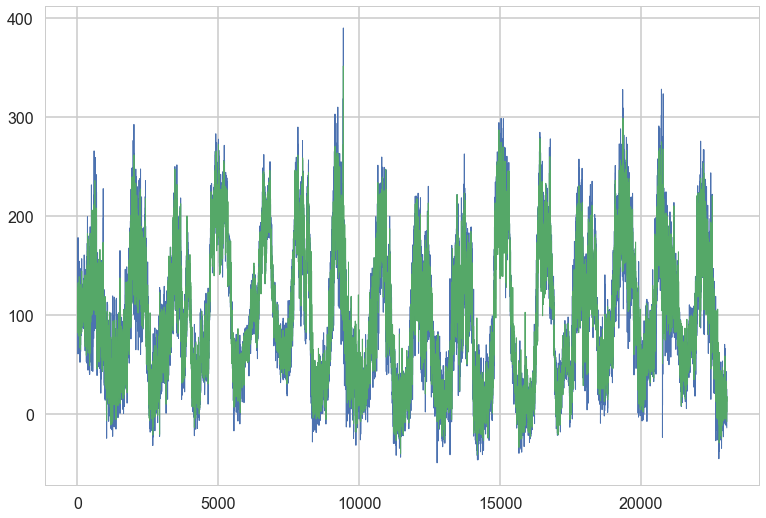

In [152]:
plt.plot(y.values, linewidth=1)
plt.plot(tree.predict(X), linewidth=1)

Fill missing

In [155]:
d = df.loc['2017-04-03':'2017-04-17'].drop(['str_229', 'pressure_2753'], axis=1)
d.tmp_271 = d.tmp_271.fillna(d.tmp_271.median())
d.disp_204 = d.disp_204.fillna(d.disp_204.median())

In [156]:
d.isnull().sum()

trf_count       0
tmp_271         0
str_134      6104
disp_204        0
dtype: int64

In [157]:
X = d.drop('str_134', axis=1)

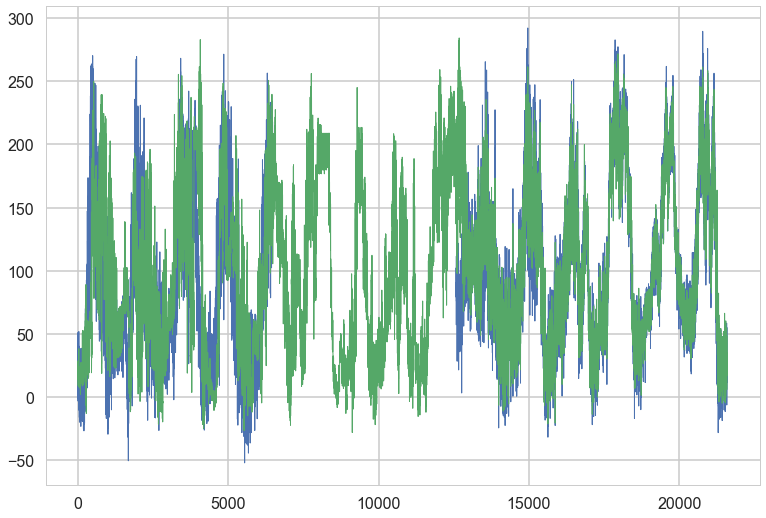

In [158]:
plt.plot(d.str_134.values, linewidth=1)
plt.plot(tree.predict(X), linewidth=1)

What does it show?

Random Forest Regressor can detect the response cycle of the strain gauge, possibly by using traffic, temperature and displacement variation data. Fig above shows the regressor able to fill the missing data relatively well (gut feeling).

Problem: How to automate and scale up this technique?